In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [112]:
# local files for Apple, Google and Citymapper

afile = 'applemobilitytrends-2020-04-16.csv'
gfile = 'Global_Mobility_Report.csv'
cfile = 'Citymapper_Mobility_Index_20200417.csv'


## Apple

> https://www.apple.com/covid19/mobility The data comes from the Apple 'Maps' phone app. It offers the user a choice of 'Drive, Walk, Transit or Ride'. Apple writes:

> [...] Maps doesn’t associate your data with your Apple ID, and Apple doesn’t keep a history of where you’ve been. This data is generated by **counting the number of requests made to Apple Maps for directions** in select countries/regions and cities. Data that is sent from users’ devices to the Maps service is associated with random, rotating identifiers so Apple doesn’t have a profile of your movements and searches. Data availability in a particular country/region or city is subject to a number of factors, including minimum thresholds for direction requests made per day. [...] The CSV file and charts on this site show a **relative volume of directions requests per country/region or city compared to a baseline volume on January 13th, 2020**. We define our day as midnight-to-midnight, Pacific time. Cities represent usage in greater metropolitan areas and are stably defined during this period. In many countries/regions and cities, relative volume has increased since January 13th, consistent with normal, seasonal usage of Apple Maps. Day of week effects are important to normalize as you use this data. Data that is sent from users’ devices to the Maps service is associated with random, rotating identifiers so Apple doesn’t have a profile of your movements and searches. Apple Maps has no demographic information about our users, so we can’t make any statements about the representativeness of our usage against the overall population.

### import dataset untransposed initially to build a concatenated header list from a multi-index

In [123]:
# import df

path = f'/Users/aidanair/Documents/DATA/ALL_DATASETS/COVID/{afile}'
predf = pd.read_csv(path, encoding = 'utf-8')
predf[:2]

,geo_type,region,transportation_type,2020-01-13,2020-01-14,2020-01-15,2020-01-16,2020-01-17,2020-01-18,2020-01-19,...,2020-04-06,2020-04-07,2020-04-08,2020-04-09,2020-04-10,2020-04-11,2020-04-12,2020-04-13,2020-04-14,2020-04-15
0,country/region,Albania,driving,100,95.30,101.43,97.20,103.55,112.67,104.83,...,26.40,26.03,26.43,26.70,26.32,25.47,24.89,32.64,31.43,30.67
1,country/region,Albania,walking,100,100.68,98.93,98.46,100.85,100.13,82.13,...,31.13,25.80,29.81,28.96,27.29,27.63,29.59,35.52,38.08,35.48


In [114]:
# build up a 'headers_list' from the top two rows

reg_list = list(predf.region)
trans_list = list(predf.transportation_type)

headers_list = []

ctr = 0
for x in range (len(reg_list)):
    headers_list.append(reg_list[ctr] + "_" + trans_list[ctr])
    ctr = ctr + 1
    
print (len(headers_list))
    

395


### Re-import - transposed - and clean

In [119]:

path = f'/Users/aidanair/Documents/DATA/ALL_DATASETS/COVID/{afile}'

a_df = pd.read_csv(path, encoding = 'utf-8', index_col = 0).T


In [120]:
# drop the first 2 rows, assign column headers
a_df = a_df[2:]

# assign the column headers list
a_df.columns = headers_list

# rename the messy Birmingham cols. 
a_df.rename(columns={'Birmingham - UK_driving': 'Birmingham_driving',
                   'Birmingham - UK_transit':'Birmingham_transit',
                   'Birmingham - UK_walking':'Birmingham_walking'}, inplace=True)

# cast the index of dates to datetime
a_df.index = pd.to_datetime(a_df.index)

# only take date from March 2
a_df = a_df['2020-03-02':]

<function matplotlib.pyplot.show(*args, **kw)>

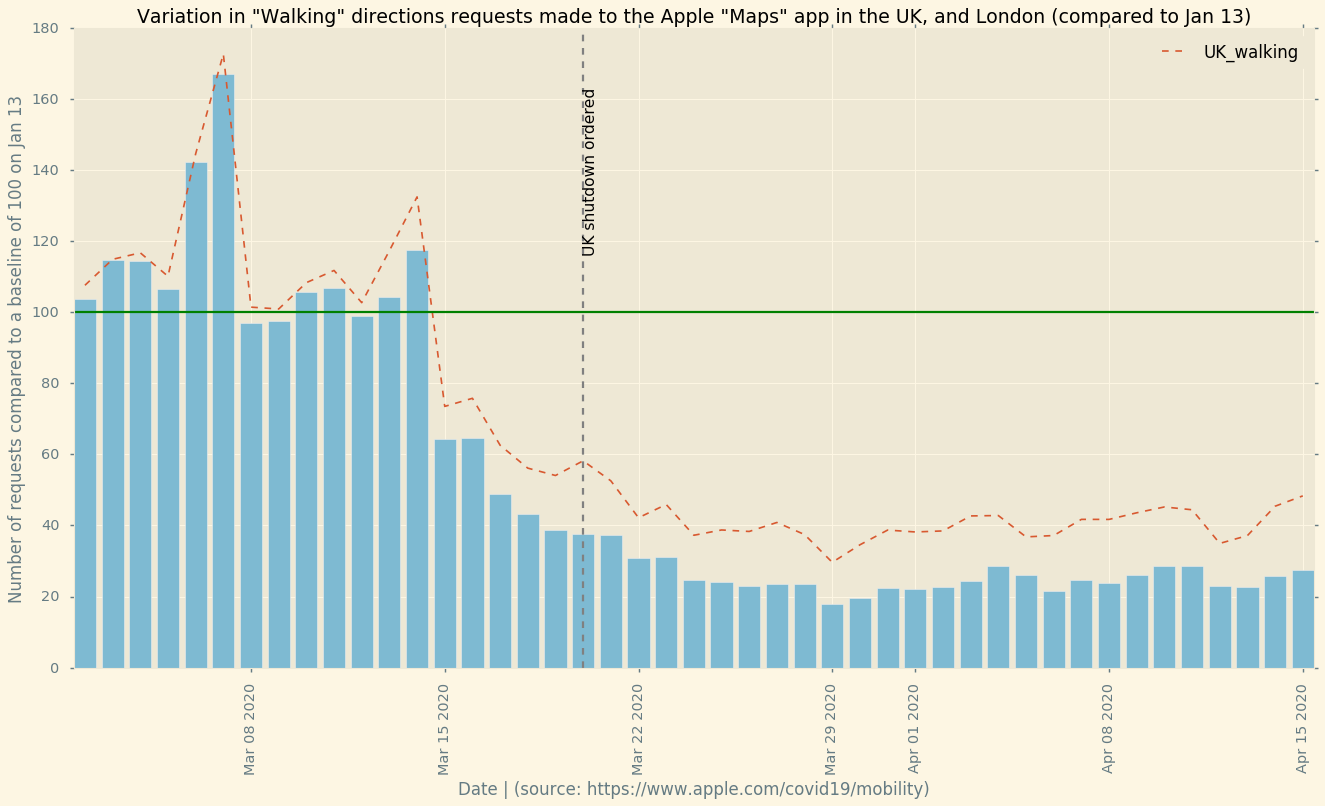

In [166]:
plt.style.use('Solarize_Light2')

fig, ax = plt.subplots(figsize = (20, 10))

plt.bar(a_df.index, a_df.London_walking, color = '#7ebad2')
plt.plot(a_df.index, a_df.UK_walking, color = '#d85930', linestyle = '--', linewidth = 1.5)

plt.axhline(y = 100, xmin=0, xmax=1, color = 'g')
plt.axvline(x = '2020-03-20', ymin=0, ymax=1, color = 'gray', linestyle = '--')
plt.annotate("UK shutdown ordered", ('2020-03-20', 160), rotation = 'vertical', size = 14)

plt.legend(loc = 1, prop = {'size': 15})

ax.set_title('Variation in "Walking" directions requests made to the Apple "Maps" app in the UK, and London \
(compared to Jan 13)', size = 17)

ax.set_xlabel('Date | (source: https://www.apple.com/covid19/mobility)', size = 15)
ax.set_ylabel('Number of requests compared to a baseline of 100 on Jan 13', size = 15)

plt.xticks(rotation = 'vertical')
plt.show

### Note. The baseline period shows a regular weekly pattern where 'Walking directions' requests increase during the week, peaking on Friday and then Saturday before falling on Sunday. When the number of requests collapses across the UK in the second half of March, it falls even further in London. Essentially, when movement slows in the UK, it slows even more in London. This is however a sample of an undeclared size and is restricted to users of Apple's "Maps" app.

## Citymapper
> https://citymapper.com/cmi/about

>Citymapper writes: "The Citymapper Mobility Index is calculated by comparing trips planned in the Citymapper app to a recent typical usage period. Trips planned ('Get Me Somewhere' and related) are correlated to trips taken (GO mode). **Typical usage period is defined as 4 weeks between Jan 6th and Feb 2nd, 2020**. To better capture typical usage in certain cities we are using different periods in Paris (Feb 3rd to March 1st) and Hong Kong and Singapore (both Dec 2nd to Dec 22nd). A day is defined as midnight to midnight UTC, thus for certain cities may not correspond with calendar days. We update the data every day at 7am UTC. Our users are public transport users and also use us for walking, cycling, and some micromobility and cabs. We are not used for driving. We do not track the demographics of our users. We have enough data in our published cities to be confident that it represents a real change in behaviour. **However, it is a sample set of general mobility and may not represent the real world exactly".**

In [63]:
path = f'/Users/aidanair/Documents/DATA/ALL_DATASETS/COVID/{cfile}'

c_df = pd.read_csv(path, encoding = 'utf-8', skiprows = 3)


In [64]:
# cast 'Date' column to datetime
c_df['Date'] = pd.to_datetime(c_df['Date'], format = "%Y-%m-%d")

# filter to remove the dates where nothing's happening. Start the dataset at March 2
new_df = c_df[42:]


<function matplotlib.pyplot.show(*args, **kw)>

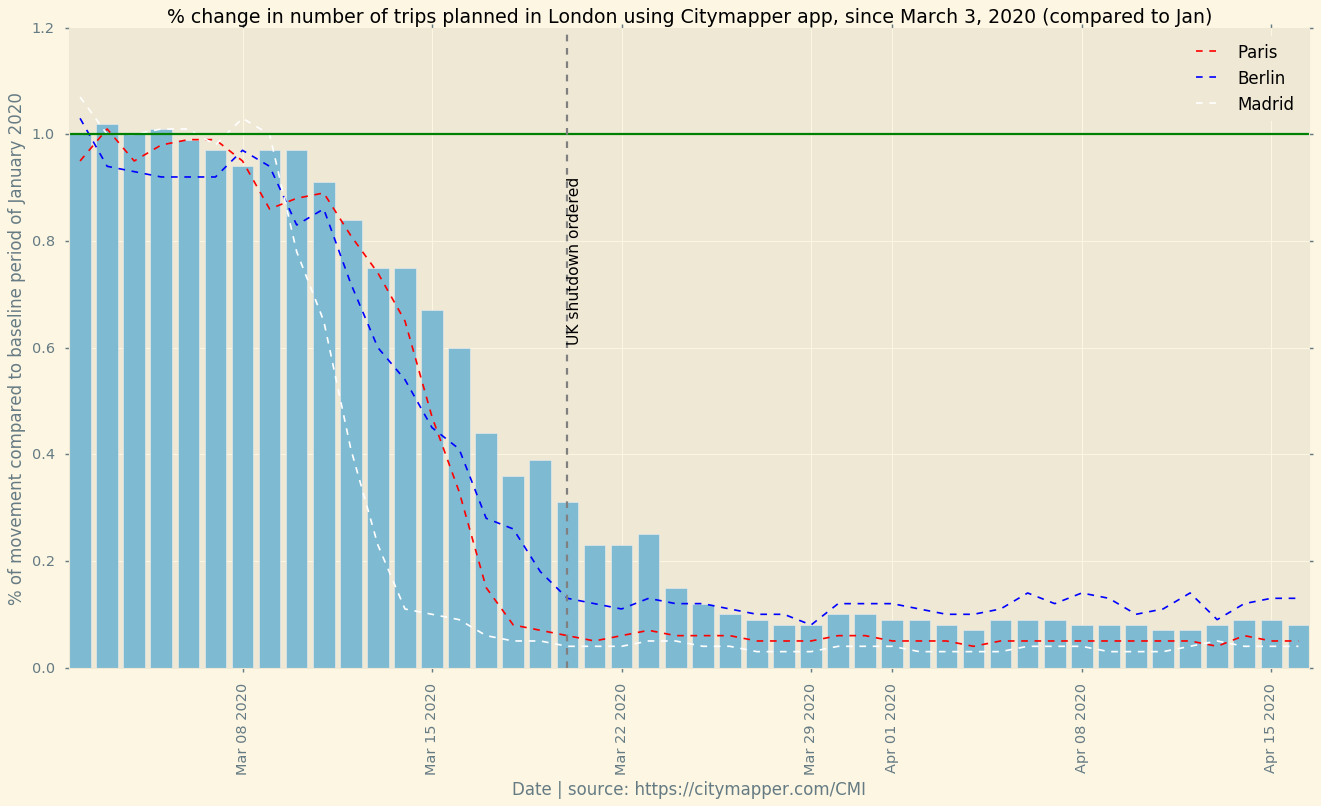

In [176]:
plt.style.use('Solarize_Light2')

fig, ax = plt.subplots(figsize = (20, 10))

plt.bar(c_df.Date, c_df.London, color = '#7ebad2')
plt.plot(c_df.Date, c_df.Paris, color = 'r', linestyle = '--', linewidth = 1.5)
plt.plot(c_df.Date, c_df.Berlin, color = 'b', linestyle = '--', linewidth = 1.5)
plt.plot(c_df.Date, c_df.Madrid, color = 'white', linestyle = '--', linewidth = 1.5)

plt.axhline(y = 1.0, xmin=0, xmax=1, color = 'g')
plt.axvline(x = '2020-03-20', ymin=0, ymax=1, color = 'gray', linestyle = '--')
plt.annotate("UK shutdown ordered", ('2020-03-20', 0.9), rotation = 'vertical', size = 14)

plt.legend(loc = 1, prop = {'size': 15})

ax.set_title('% change in number of trips planned in London using Citymapper app, since March 3, 2020 (compared to Jan)', size = 17)

ax.set_xlabel('Date | source: https://citymapper.com/CMI', size = 15)
ax.set_ylabel('% of movement compared to baseline period of January 2020', size = 15)

plt.xticks(rotation = 'vertical')
plt.show

### Google

> Google's Global csv available here: https://www.google.com/covid19/mobility/ & info here: https://www.blog.google/technology/health/covid-19-community-mobility-reports and here: (at the end of the pdf report): https://www.gstatic.com/covid19/mobility/2020-04-11_GB_Mobility_Report_en.pdf

> Google writes: "These reports show how visits and length of stay at different places change compared to a baseline. We calculate these changes using the same kind of aggregated and anonymized data used to show popular times for places in Google Maps. Changes for each day are compared to **a baseline value for that day of the week: The baseline is the median value, for the corresponding day of the week, during the 5-week period Jan 3–Feb 6, 2020**.The reports show trends over several weeks with the most recent data representing approximately 2-3 days ago — this is how long it takes to produce the reports. What data is included in the calculation depends on user settings, connectivity, and whether it meets our privacy threshold. If the privacy threshold isn’t met (when somewhere isn’t busy enough to ensure anonymity) we don’t show a change for the day. We include categories that are useful to social distancing efforts as well as access to essential services. We calculate these insights based on data from users who have opted-in to Location History for their Google Account, so the data represents a sample of our users. **As with all samples, this may or may not represent theexact behavior of a wider population**".

In [193]:
path = f'/Users/aidanair/Documents/DATA/ALL_DATASETS/COVID/{gfile}'

# Note: the column headers have been shortened on import. The original data describes the variables as 
#'percent change from baseline'.
names = 'code country region region2 date retail_recreation grocery_pharmacy parks stations workplaces residential'.split()

g_df = pd.read_csv(path, names = names, encoding = 'utf-8', skiprows = 1, low_memory = False)


In [130]:
# cast to datetime with pandas method
g_df['date'] = pd.to_datetime(g_df['date'])

# drop region2 column
g_df.drop('region2', axis=1, inplace = True)

# filter for only London data
g_df = g_df[(g_df.country == 'United Kingdom') & (g_df.region == 'Greater London')]

# filter for only from March 2
g_df = g_df[g_df.date > '2020-03-01']

<function matplotlib.pyplot.show(*args, **kw)>

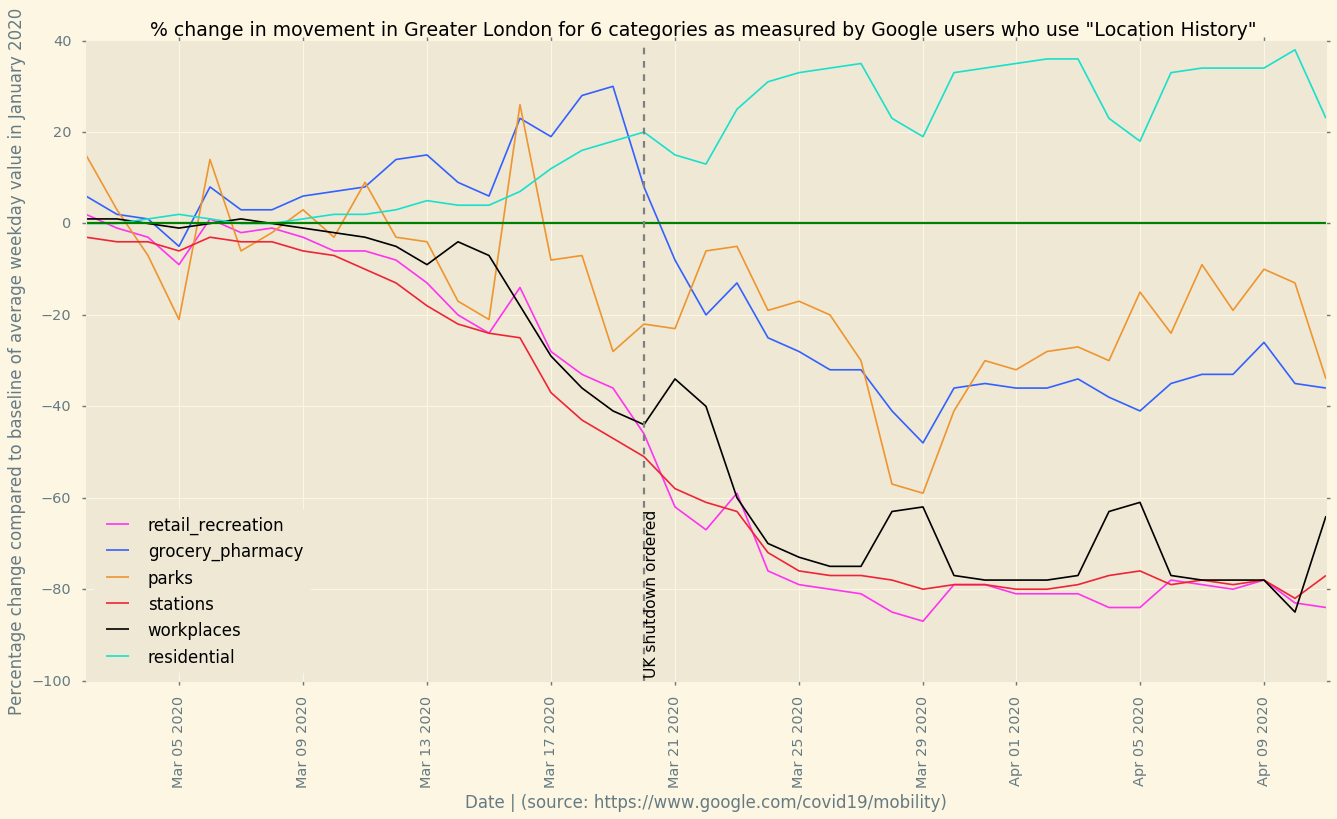

In [182]:
plt.style.use('Solarize_Light2')

fig, ax = plt.subplots(figsize = (20, 10))

plt.plot(g_df.date, g_df.retail_recreation, color = '#ff33f0', linewidth = 1.5)
plt.plot(g_df.date, g_df.grocery_pharmacy, color = '#3361ff', linewidth = 1.5)
plt.plot(g_df.date, g_df.parks, color = '#ef9530', linewidth = 1.5)
plt.plot(g_df.date, g_df.stations, color = '#ee2537', linewidth = 1.5)
plt.plot(g_df.date, g_df.workplaces, color = 'black', linewidth = 1.5)
plt.plot(g_df.date, g_df.residential, color = '#19e0cb', linewidth = 1.5)

plt.axhline(y = 0, xmin=0, xmax=1, color = 'g')

plt.legend(loc = 3, prop = {'size': 15})

plt.axvline(x = '2020-03-20', ymin=0, ymax=1, color = 'gray', linestyle = '--')
plt.annotate("UK shutdown ordered", ('2020-03-20', -65), rotation = 'vertical', size = 14)

ax.set_title('% change in movement in Greater London for 6 categories as measured by Google users who use "Location History" ', size = 17)
ax.set_xlabel('Date | (source: https://www.google.com/covid19/mobility)', size = 15)
ax.set_ylabel('Percentage change compared to baseline of average weekday value in January 2020', size = 15)

plt.xticks(rotation = 'vertical')
plt.show